In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn import preprocessing
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
iris = fetch_ucirepo(id=53)

### Dataset and Preprocessing

Preprocess data

In [2]:
X = iris.data.features
Y = iris.data.targets

# Handling missing values
# The dataset does not have any missing values as stated on the dataset description
# https://archive.ics.uci.edu/dataset/53/iris

# Normalizing numerical features (which one??)
# normalizing
d = preprocessing.normalize(X,axis=0)
X = pd.DataFrame(d,columns=X.columns)

# standardizing
# mean = np.mean(X,axis=0)
# std = np.std(X,axis=0)
# X_1 = (X-mean)/std

# Encoding categorical variables
# label encoding
Y_encoded = []
for y in Y['class']:
  if y == 'Iris-setosa':
    Y_encoded.append(0)
  elif y == 'Iris-versicolor':
    Y_encoded.append(1)
  else:
    Y_encoded.append(2)

nb_classes = len(np.unique(iris.data.targets['class']))
# convert label encoding to one hot encoding
Y = keras.utils.to_categorical(Y_encoded,num_classes=nb_classes)

Split data into training and validation sets

In [3]:
train_ratio = 0.8
train_length = X.shape[0]
train_split = int(train_ratio*train_length)
X_train, Y_train = X[:train_split], Y[:train_split]
X_val, Y_val= X[train_split:], Y[train_split:]

print('Train Size: ', X_train.shape[0], 'Valid Size: ', X_val.shape[0])

Train Size:  120 Valid Size:  30


### Model Architecture
keep the number of trainable parameters as low as possible. Define the following neural network:

Initial Layers: Build an MLP in Keras to process the input features.

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout,Add,Input
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
inputs = Input(shape=(X_train.shape[1],))

# two dense layers
dense_layer1 = Dense(128,activation='relu')(inputs)
dense_layer2 = Dense(128,activation='relu')(dense_layer1)
dense_layer3 = Dense(128,activation='relu')(dense_layer2)

# residual connection
res_connection = Add()([dense_layer1,dense_layer3])

dense_layer4 = Dense(128,activation='relu')(res_connection)
dense_layer5 = Dense(128,activation='relu')(dense_layer4)
dense_layer6 = Dense(128,activation='relu')(dense_layer5)

# skip connection
dense_layer7 = Dense(128,activation='relu')(dense_layer6)
dense_layer8 = Dense(128,activation='relu')(dense_layer7)
skip_connection = Add()([dense_layer4,dense_layer8])


outputs = Dense(3,activation='sigmoid')(skip_connection)
model = Model(inputs=inputs,outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.save('my_model.keras',save_format='h5')

In [10]:
network_history = model.fit(X_train, Y_train,
                            validation_data=(X_val,Y_val),
                            batch_size=128,
                            epochs=60,
                            verbose=1)

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2833 - loss: 1.0967 - val_accuracy: 0.0000e+00 - val_loss: 1.1462
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4167 - loss: 1.0842 - val_accuracy: 0.0000e+00 - val_loss: 1.1829
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4167 - loss: 1.0732 - val_accuracy: 0.0000e+00 - val_loss: 1.2243
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4167 - loss: 1.0627 - val_accuracy: 0.0000e+00 - val_loss: 1.2685
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4167 - loss: 1.0520 - val_accuracy: 0.0000e+00 - val_loss: 1.3183
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4167 - loss: 1.0409 - val_accuracy: 0.0000e+00 - val_loss: 1.3752
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4167 - loss: 1.0296 - val_accuracy: 0.0000e+00 - val_loss: 1.4385
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4167 - loss: 1.0180 - val_accuracy:

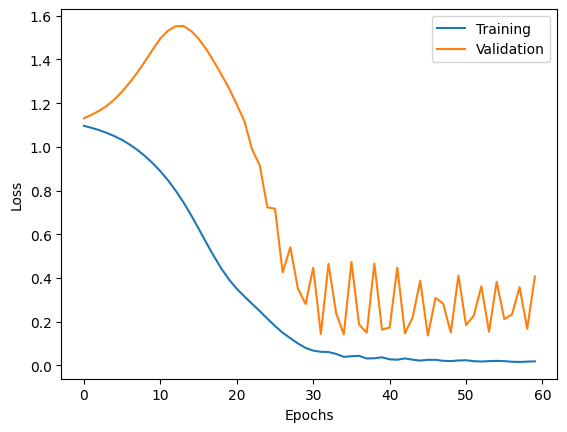

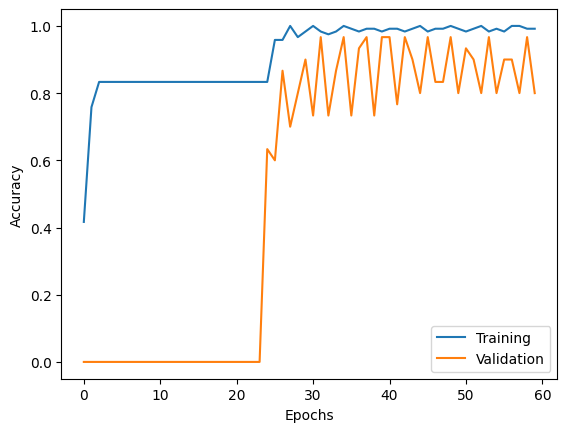

In [7]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

The model actually performs quite well since the loss decreases and accuracy increases with the number of epochs.

In [11]:
print('Number of Parameters',model.count_params())
print('Final Training Loss',network_history.history['loss'][-1])
print('Final Validation Loss',network_history.history['val_loss'][-1])

Number of Parameters 116611
Final Training Loss 0.026071257889270782
Final Validation Loss 0.29452961683273315
